#### Keras

In [1]:
%load_ext autoreload
%autoreload

#### import all modules and libraries

In [2]:
import os.path
import os
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import itertools
import matplotlib.pyplot as plt

In [3]:
train_labels = []
train_samples = []

Example Data:

An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
The trial had 2100 participants. Half were under 65 years old, half were 65years or older.
Around 95% of patients 65 or older experienced side effects.
Around 95% of patients under 65 experienced no side effects.

In [4]:
for i in range(50):
    
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    

for i in range(1000):
    
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [5]:
train_labels= np.array(train_labels)
train_samples= np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
for i in scaled_train_samples:
    print(i)

[0.43678161]
[0.85057471]
[0.89655172]
[0.48275862]
[0.03448276]
[0.56321839]
[0.08045977]
[0.35632184]
[0.04597701]
[0.94252874]
[0.73563218]
[0.14942529]
[0.87356322]
[0.57471264]
[0.87356322]
[0.87356322]
[0.77011494]
[0.16091954]
[0.59770115]
[0.94252874]
[0.29885057]
[0.33333333]
[0.6091954]
[0.40229885]
[0.14942529]
[0.5862069]
[0.75862069]
[0.73563218]
[0.91954023]
[0.73563218]
[0.32183908]
[0.82758621]
[0.6091954]
[0.04597701]
[0.13793103]
[0.87356322]
[0.26436782]
[0.87356322]
[0.40229885]
[0.04597701]
[0.77011494]
[0.79310345]
[0.93103448]
[0.2183908]
[0.47126437]
[0.50574713]
[0.28735632]
[0.51724138]
[0.73563218]
[0.97701149]
[0.73563218]
[0.85057471]
[0.13793103]
[0.26436782]
[0.29885057]
[0.50574713]
[0.87356322]
[0.55172414]
[0.75862069]
[0.62068966]
[0.48275862]
[0.12643678]
[0.28735632]
[0.52873563]
[0.5862069]
[0.28735632]
[0.87356322]
[0.47126437]
[0.62068966]
[0.14942529]
[0.1954023]
[0.08045977]
[0.88505747]
[0.75862069]
[0.97701149]
[0.63218391]
[0.62068966]
[0.08

##### How to create ANN using SeqeuntialModel from Keras API

In [8]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [9]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


##### Training the ANN with keras API integrated with Tensorflow

In [11]:
 model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.6756 - accuracy: 0.5724
Epoch 2/30
210/210 - 0s - loss: 0.6463 - accuracy: 0.6729
Epoch 3/30
210/210 - 0s - loss: 0.6159 - accuracy: 0.7138
Epoch 4/30
210/210 - 0s - loss: 0.5828 - accuracy: 0.7595
Epoch 5/30
210/210 - 0s - loss: 0.5476 - accuracy: 0.8052
Epoch 6/30
210/210 - 0s - loss: 0.5123 - accuracy: 0.8257
Epoch 7/30
210/210 - 0s - loss: 0.4775 - accuracy: 0.8457
Epoch 8/30
210/210 - 0s - loss: 0.4457 - accuracy: 0.8600
Epoch 9/30
210/210 - 0s - loss: 0.4165 - accuracy: 0.8800
Epoch 10/30
210/210 - 0s - loss: 0.3911 - accuracy: 0.8952
Epoch 11/30
210/210 - 0s - loss: 0.3692 - accuracy: 0.8995
Epoch 12/30
210/210 - 0s - loss: 0.3506 - accuracy: 0.9048
Epoch 13/30
210/210 - 0s - loss: 0.3353 - accuracy: 0.9100
Epoch 14/30
210/210 - 0s - loss: 0.3223 - accuracy: 0.9148
Epoch 15/30
210/210 - 0s - loss: 0.3117 - accuracy: 0.9195
Epoch 16/30
210/210 - 0s - loss: 0.3032 - accuracy: 0.9262
Epoch 17/30
210/210 - 0s - loss: 0.2957 - accuracy: 0.9324
Epoch 

##### How to use tensorflow kerasAPI to create a validation set during training

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2593 - accuracy: 0.9333 - val_loss: 0.2405 - val_accuracy: 0.9571
Epoch 2/30
189/189 - 0s - loss: 0.2585 - accuracy: 0.9354 - val_loss: 0.2384 - val_accuracy: 0.9476
Epoch 3/30
189/189 - 0s - loss: 0.2577 - accuracy: 0.9349 - val_loss: 0.2375 - val_accuracy: 0.9476
Epoch 4/30
189/189 - 0s - loss: 0.2570 - accuracy: 0.9392 - val_loss: 0.2360 - val_accuracy: 0.9476
Epoch 5/30
189/189 - 0s - loss: 0.2562 - accuracy: 0.9349 - val_loss: 0.2363 - val_accuracy: 0.9476
Epoch 6/30
189/189 - 0s - loss: 0.2558 - accuracy: 0.9370 - val_loss: 0.2356 - val_accuracy: 0.9476
Epoch 7/30
189/189 - 0s - loss: 0.2552 - accuracy: 0.9354 - val_loss: 0.2340 - val_accuracy: 0.9476
Epoch 8/30
189/189 - 0s - loss: 0.2545 - accuracy: 0.9365 - val_loss: 0.2353 - val_accuracy: 0.9571
Epoch 9/30
189/189 - 0s - loss: 0.2542 - accuracy: 0.9365 - val_loss: 0.2352 - val_accuracy: 0.9571
Epoch 10/30
189/189 - 0s - loss: 0.2537 - accuracy: 0.9402 - val_loss: 0.2327 - val_accuracy: 0.9476

##### Test Dataset implementation

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(50):
    
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    

for i in range(1000):
    
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_samples, test_labels)

In [17]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

##### Predict

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in predictions:
    print(i)

[0.9729556  0.02704437]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.01610089 0.9838991 ]
[0.01610089 0.9838991 ]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.9729556  0.02704437]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.01610089 0.9838991 ]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.9729556  0.02704437]
[0.01610089 0.9838991 ]
[0.9729556  0.02704437]
[0.9729556  0.02704437]
[0.9729556  0.02

In [20]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [21]:
for i in rounded_predictions:
    print(i)

0
0
1
0
1
1
1
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1
0
1
0
1
0
0
1
0
1
0
1
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
1
0
0
0
1
0
1
1
0
0
0
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
1
1
1
1
0
0
0
1
0
0
1
0
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
1
0
0
1
1
0
0
0
1
0
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
1
1
1
0
0
1
0
1
1
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
1
1
0
1
1
1
0
0
1
1
1
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
1
1
1
1
0
1
1
0
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
0
1
0
0
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
0
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
1
1
0
0
1
0
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
1
1
1
1
1
1
0
0


##### How to use a confusion matrix to visualize NN during inference

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

Confusion matrix, without normalization
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [28  1  0 ...  0  0  0]
 ...
 [ 2 31  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 1 29  0 ...  0  0  0]]


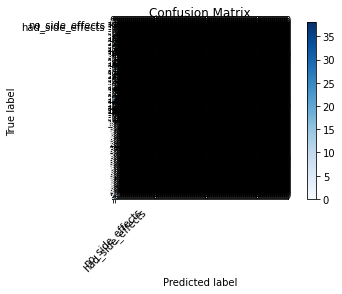

In [24]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

##### Multiple ways to save and load a keras sequential model

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [27]:
new_model = load_model('models/medical_trial_model.h5')

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
new_model.get_weights()

[array([[-0.28669423, -0.03622091, -0.58986396,  0.571631  , -0.42082542,
          0.53849435, -0.45952904, -0.01890236,  0.39592794, -0.5621339 ,
         -0.08366907,  0.6136931 , -0.18286872, -0.50335807, -0.3715212 ,
         -0.18764785]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.17905684,  0.        ,
        -0.20294762,  0.        ,  0.        ,  0.1328627 ,  0.        ,
         0.        , -0.19486244,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 2.81022698e-01,  2.16751128e-01,  1.07884407e-04,
         -2.15250522e-01, -3.43640774e-01,  8.63056183e-02,
          3.19614321e-01,  2.14053690e-02, -1.42564580e-01,
          8.73581171e-02, -2.14393765e-01, -1.31828517e-01,
         -1.44202411e-01, -2.04775855e-01, -2.41157517e-01,
         -2.73497641e-01,  3.00105959e-01, -3.21430057e-01,
         -1.49369866e-01, -3.19085360e-01, -1.21904865e-01,
         -2.34788626e-01,  2.21117437e-02,  3.58772278e-03,
 

In [30]:
new_model.optimizer

##### save to json

In [31]:
json_string = model.to_json()

In [32]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [33]:
model_architecture = model_from_json(json_string)

In [34]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [35]:
if os.path.isfile('models/my_models_weights.h5') is False:
    model.save_weights('models/my_models_weights.h5')

In [36]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [37]:
model2.load_weights('models/my_models_weights.h5')

In [38]:
model2.get_weights()

[array([[-0.28669423, -0.03622091, -0.58986396,  0.571631  , -0.42082542,
          0.53849435, -0.45952904, -0.01890236,  0.39592794, -0.5621339 ,
         -0.08366907,  0.6136931 , -0.18286872, -0.50335807, -0.3715212 ,
         -0.18764785]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.17905684,  0.        ,
        -0.20294762,  0.        ,  0.        ,  0.1328627 ,  0.        ,
         0.        , -0.19486244,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 2.81022698e-01,  2.16751128e-01,  1.07884407e-04,
         -2.15250522e-01, -3.43640774e-01,  8.63056183e-02,
          3.19614321e-01,  2.14053690e-02, -1.42564580e-01,
          8.73581171e-02, -2.14393765e-01, -1.31828517e-01,
         -1.44202411e-01, -2.04775855e-01, -2.41157517e-01,
         -2.73497641e-01,  3.00105959e-01, -3.21430057e-01,
         -1.49369866e-01, -3.19085360e-01, -1.21904865e-01,
         -2.34788626e-01,  2.21117437e-02,  3.58772278e-03,
 

#### Convolutional Neural Networks

In [45]:
os.chdir('dogs-vs-cats/train/')

if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

In [46]:
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')

os.chdir('../../')

In [51]:
train_path = 'dogs-vs-cats/train/train'
valid_path = 'dogs-vs-cats/train/valid'
test_path = 'dogs-vs-cats/train/test'

In [52]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
             .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
             .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
             .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False) 

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [56]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test
